In [80]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, models
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [91]:
# 0 - r ankle, 1 - r knee, 2 - r hip, 3 - l hip, 4 - l knee, 5 - l ankle, 6 - pelvis, 7 - thorax, 8 - upper neck, 9 - head top, 10 - r wrist, 11 - r elbow, 12 - r shoulder, 13 - l shoulder, 14 - l elbow, 15 - l wrist
body_point_names = ["R_ANKLE", "R_KNEE", "R_HIP", "L_HIP", "L_KNEE", "L_ANKLE", "PELVIS", "THORAX", "UPPER_NECK", "HEAD_TOP", "R_WRIST", "R_ELBOW", "R_SHOULDER", "L_SHOULDER", "L_ELBOW", "L_WRIST"]

data_path = r'../../data/pose_estimator/images/'

batch_size = 50

In [22]:
rows = []
with open('../../data/mpii_annotation.json') as json_file:
    data = json.load(json_file)
    annotations = data['annolist']

    
    for ann in annotations:
        row = [None] * (1 + len(body_point_names))
        row[0] = ann['image']['name']
        
        body_points_ann = ann['annorect']
        
        if type(body_points_ann) is 'list':
            continue
        if 'annopoints' not in body_points_ann:
            continue
        
        points = body_points_ann['annopoints']['point']
        for point in points:
            row[point['id']+1] = (point['x'], point['y'], (point['is_visible'] == 1))
            
        rows.append(row)

In [23]:
df = pd.DataFrame(rows, columns=["IMAGE"] + body_point_names)

In [24]:
df.sample()

,IMAGE,R_ANKLE,R_KNEE,R_HIP,L_HIP,L_KNEE,L_ANKLE,PELVIS,THORAX,UPPER_NECK,HEAD_TOP,R_WRIST,R_ELBOW,R_SHOULDER,L_SHOULDER,L_ELBOW,L_WRIST
8004,093070399.jpg,"(701, 447, True)","(738, 360, True)","(673, 302, True)","(614, 311, False)","(612, 423, True)","(612, 521, True)","(644, 307, False)","(659, 167, True)","(664.4797, 157.5892, False)","(699.5203, 97.4108, False)","(777, 176, True)","(754, 225, True)","(689, 195, True)","(628, 139, True)","(567, 145, True)","(609, 122, True)"


In [25]:
df.to_csv(r'../../data/mpii_ann_df.csv')

In [77]:
img = mpimg.imread(os.path.join(data_path, 'images/060111501.jpg'))

In [78]:
df.iloc[0]

IMAGE                       060111501.jpg
R_ANKLE                  (980, 322, True)
R_KNEE                  (896, 318, False)
R_HIP                    (865, 248, True)
L_HIP                    (943, 226, True)
L_KNEE                   (948, 290, True)
L_ANKLE                  (881, 349, True)
PELVIS                   (904, 237, True)
THORAX                   (858, 135, True)
UPPER_NECK    (871.1877, 180.4244, False)
HEAD_TOP       (835.8123, 58.5756, False)
R_WRIST                  (772, 294, True)
R_ELBOW                  (754, 247, True)
R_SHOULDER               (792, 147, True)
L_SHOULDER               (923, 123, True)
L_ELBOW                 (995, 163, False)
L_WRIST                 (961, 223, False)
Name: 0, dtype: object

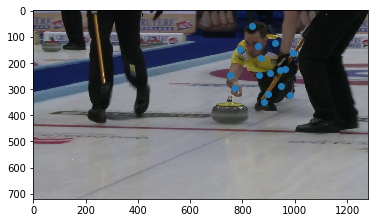

In [67]:
implot = plt.imshow(img)
xs, ys = [], []
for x, y, visible in df.iloc[0][1:]:
    xs.append(x)
    ys.append(y)

plt.scatter(x=xs, y=ys)
plt.show()

In [59]:
# 224 x 224
resnet50 = models.resnext50_32x4d(pretrained=True)
display(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stri

In [58]:
resnet50.fc = nn.Identity()
display(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stri

In [62]:
class PoseEstimator(nn.Module):
    def __init__(self):
        self.resnet50 = models.resnext50_32x4d(pretrained=True)
        resnet50.fc = nn.Identity()
        
        self.after_resnet = nn.ModuleList()
        after_resnet.append(nn.Linear(2048, 512))
        after_resnet.append(nn.ReLU())
        after_resnet.append(nn.Linear(512, 32))
        
    def forward(self, x):
        x = self.resnet50(x)
        
        for layer in self.after_resnet:
            x = layer(x)
        
        return x

In [83]:
transform = torchvision.transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.ImageFolder(
    root=data_path,
    transform=transform
)

total_size = len(dataset)
train_size = int(total_size * 0.8)
test_size = total_size - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [90]:
print (len(train_dataset))
print (len(test_dataset))

19987
4997


In [92]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=0,
    shuffle=True
)

In [93]:
for x, _ 

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 398 and 400 in dimension 3 at ..\aten\src\TH/generic/THTensor.cpp:711